In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import cPickle
from sklearn.cross_validation import StratifiedKFold
import graphviz
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
% matplotlib inline
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import seaborn as sns
plt.style.use('ggplot')

# feature import

In [3]:
new_features = cPickle.load(open('./Dump/select_logit_feature.pkl', 'rb'))

In [4]:
score_feature = pd.DataFrame(new_features).sort_values(by = 'score', ascending = False)

# Data import

In [5]:
use_feature = score_feature.loc[score_feature.score > 0.65, 'feature']

In [6]:
test = cPickle.load(open('./Dump/test_new_feature.pkl', 'rb'))
train = cPickle.load(open('./Dump/train_new_feature.pkl', 'rb'))


In [ ]:
train.SIU_CUST_YN

In [8]:
score_feature

,feature,score
25,CUST_HOSP,0.862516
24,CUST_CHME,0.855370
88,POLY_NUM,0.849886
47,FP_CUST,0.843164
76,MONEY_COUNT,0.838387
26,CUST_HOSP_DVSN,0.835615
51,HOSP_CODE,0.772072
103,VLID_HOSP_OTDA,0.765865
95,RESL_CD1,0.755562
82,PAYM_AMT,0.752250


# score가 0.75이상인친구

In [61]:
def plot_siu(colname, bin = 5):
    plt.hist([train[(train.SIU_CUST_YN==1)][colname], 
                  train[(train.SIU_CUST_YN==0)][colname]], histtype='bar', stacked=True, bins=bin)
    plt.legend(['SIU_CUST_YN = 1', 'SIU_CUST_YN = 0'])
    plt.show()

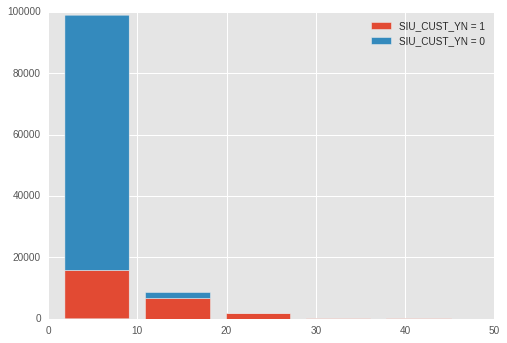

In [54]:
plot_siu('CUST_HOSP')

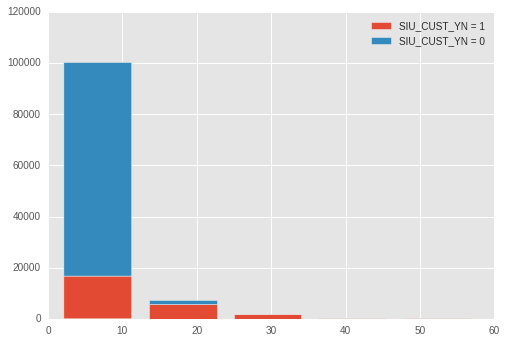

In [55]:
plot_siu('CUST_CHME')

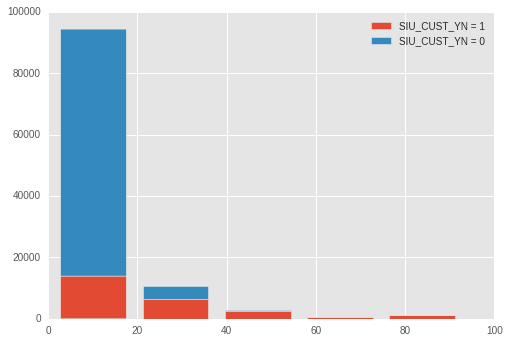

In [56]:
plot_siu('POLY_NUM')

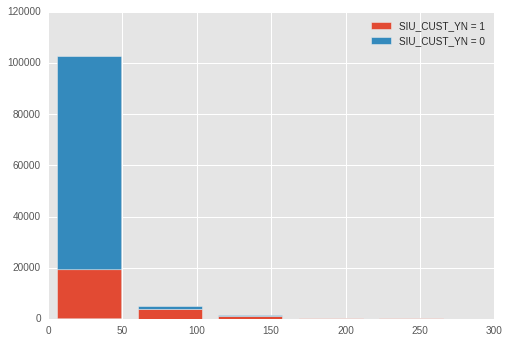

In [57]:
plot_siu('FP_CUST')

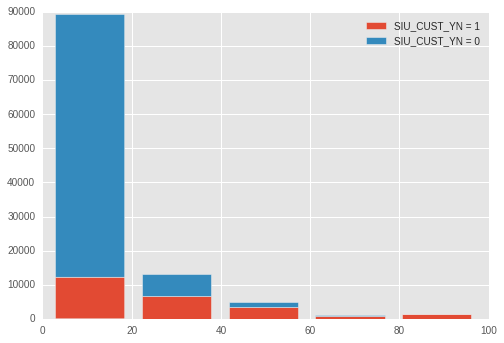

In [58]:
plot_siu('MONEY_COUNT')

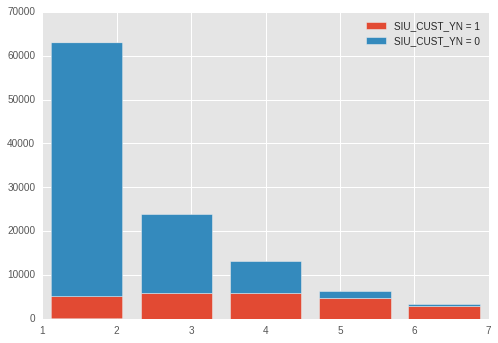

In [59]:
plot_siu('CUST_HOSP_DVSN')

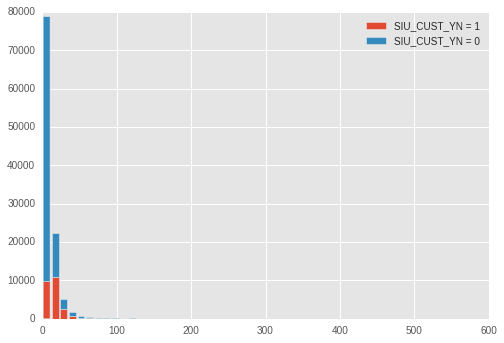

In [66]:
plot_siu('VLID_HOSP_OTDA', bin = 50)

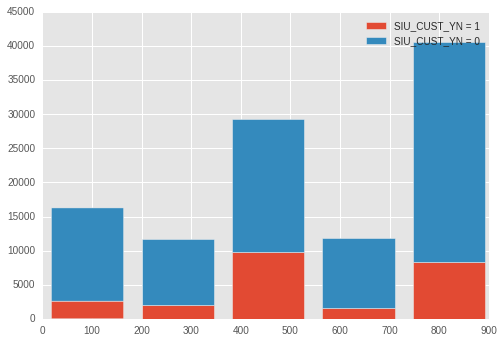

In [67]:
plot_siu('RESL_CD1')

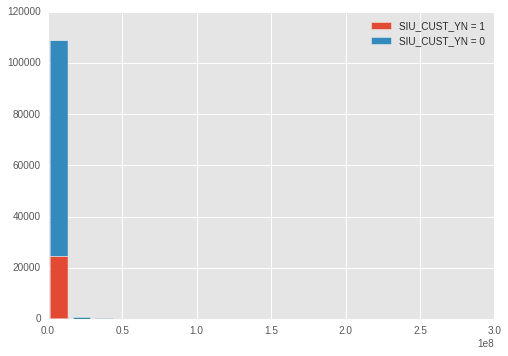

In [72]:
plot_siu('PAYM_AMT', bin = 20)

# 안좋은예

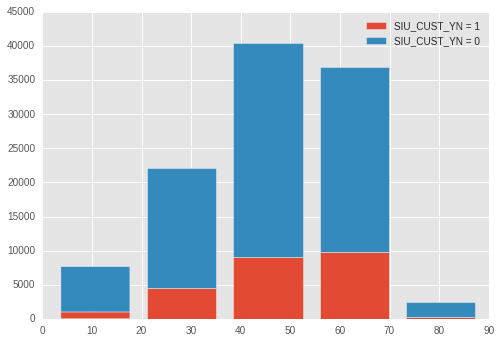

In [76]:
plot_siu('AGE')

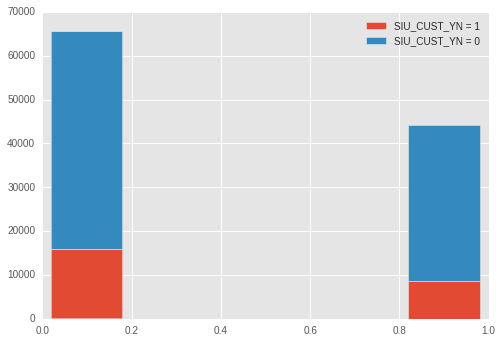

In [77]:
plot_siu('CHANG_FP_YN')

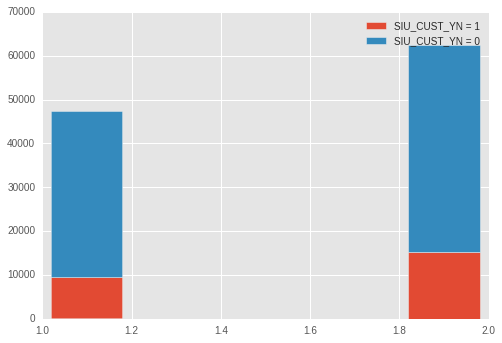

In [78]:
plot_siu('SEX')

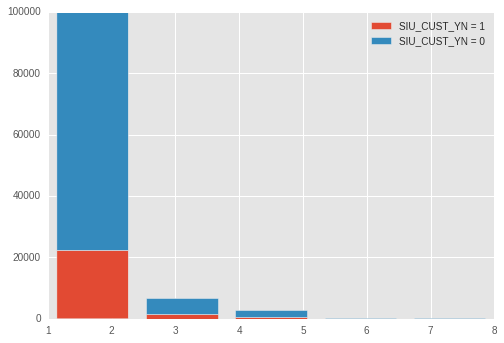

In [79]:
plot_siu('ITEM_COUNT')

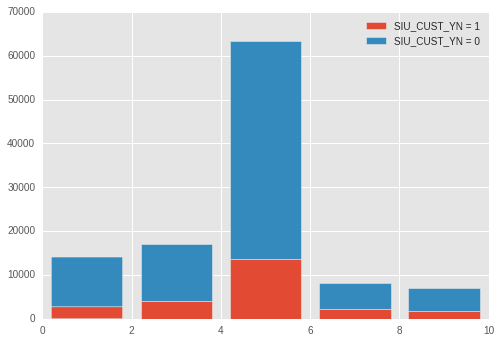

In [80]:
plot_siu('RESI_TYPE_CODE')